In [1]:
!pip install kaggle


In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!ls

'archive (1).zip'   kaggle.json   sample_data


In [4]:
from zipfile import ZipFile

dataset = "/content/archive (1).zip"

with ZipFile(dataset,"r") as zip:
  zip.extractall()
  print("The Dataset is extracted")

The Dataset is extracted


Importing Dependencies

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout , Conv2D , MaxPooling2D , Flatten , BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import cv2
from cv2 import imread
from google.colab.patches import cv2_imshow

In [6]:
print(len(os.listdir("/content/Dataset lion vs tiger/lion")))
print(len(os.listdir("/content/Dataset lion vs tiger/tiger")))

50
50


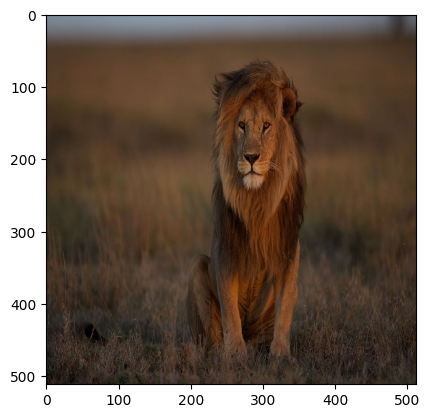

In [7]:
img_path = "/content/Dataset lion vs tiger/lion/05.jpg"

img = plt.imread(img_path)
plt.imshow(img)
plt.show()

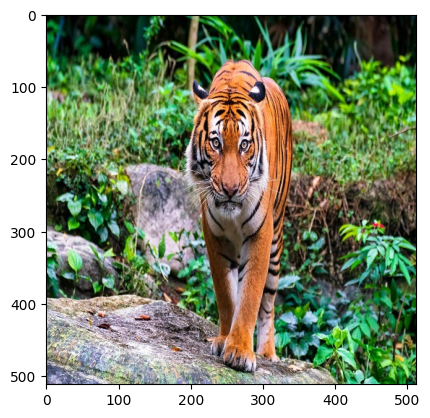

In [8]:
img_path2 = "/content/Dataset lion vs tiger/tiger/05.jpg"

img2 = plt.imread(img_path2)
plt.imshow(img2)
plt.show()

In [9]:
base_dir = "/content/Dataset lion vs tiger"
data_gen = ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.2

)

train_gen = data_gen.flow_from_directory(
    base_dir,
    target_size = (224,224),
    batch_size = 25,
    class_mode = "binary",
    subset = "training"
)

val_gen = data_gen.flow_from_directory(
    base_dir,
    target_size = (224,224),
    batch_size = 25,
    class_mode = "binary",
    subset = "validation"
)


Found 80 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [10]:
model = Sequential()

model.add(Conv2D(32,(3,3),activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())

model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(1,activation="sigmoid"))

model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

model.fit(train_gen, epochs = 10 , validation_data =val_gen)



/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.7967 - loss: 1.0083 - val_accuracy: 0.6000 - val_loss: 0.6091
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.9020 - loss: 0.3956 - val_accuracy: 0.5000 - val_loss: 0.7541
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.8905 - loss: 0.9207 - val_accuracy: 0.5000 - val_loss: 0.7249
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.9847 - loss: 0.0308 - val_accuracy: 0.5000 - val_loss: 1.0036
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.9777 - loss: 0.1023 - val_accuracy: 0.5000 - val_loss: 1.5085
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.9950 - loss: 0.0056 - val_accuracy: 0.5000 - val_loss: 1.9580
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.9373 - loss: 0.1654 - val_accuracy: 0.5000 - val_loss: 3.2509
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 1.0000 - loss: 6.0030e-05 - val_accuracy: 0.5000 - val_loss: 4